In [ ]:
# PCA (Principal Component Analysis)
# 데이터의 차원을 축소하면서 데이터의 분산을 최대한 유지하는 방법
# 데이터를 주요 성분(주성분, principal components)으로 변환하여 차원을 줄입니다
# 주요 성분은 데이터의 분산을 가장 잘 설명하는 방향을 나타냅니다

In [1]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA

In [3]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
pca.components_

array([[ 9.24490195e-06,  5.10601298e-06,  8.91640398e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.69701614e-05, -1.13551047e-05, -1.82152562e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.65220458e-05, -2.08401736e-05, -2.89870119e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.77995249e-05,  3.90074533e-05,  2.87162507e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.97022537e-05, -1.72802900e-05,  6.00466182e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.87475690e-05, -8.11411405e-05, -7.05194308e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [5]:
fruits_2d.shape

(300, 10000)

In [6]:
print(pca.components_.shape)

(50, 10000)


In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다.
    # 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다.
    # 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

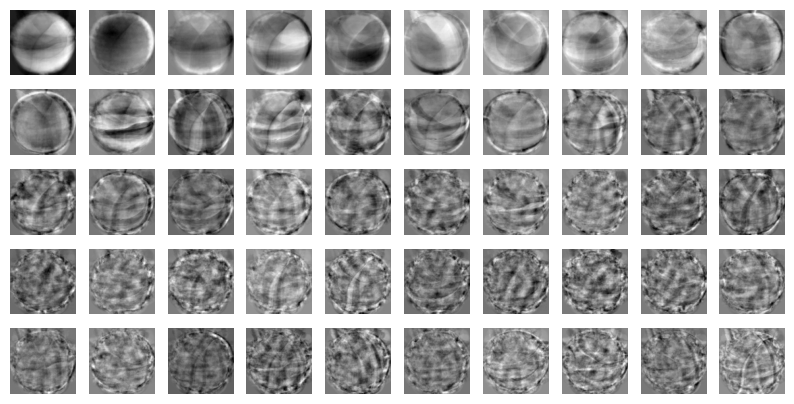

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [9]:
fruits_pca = pca.transform(fruits_2d)

In [10]:
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100) 
                                    # 크기를 다시 맞춘다

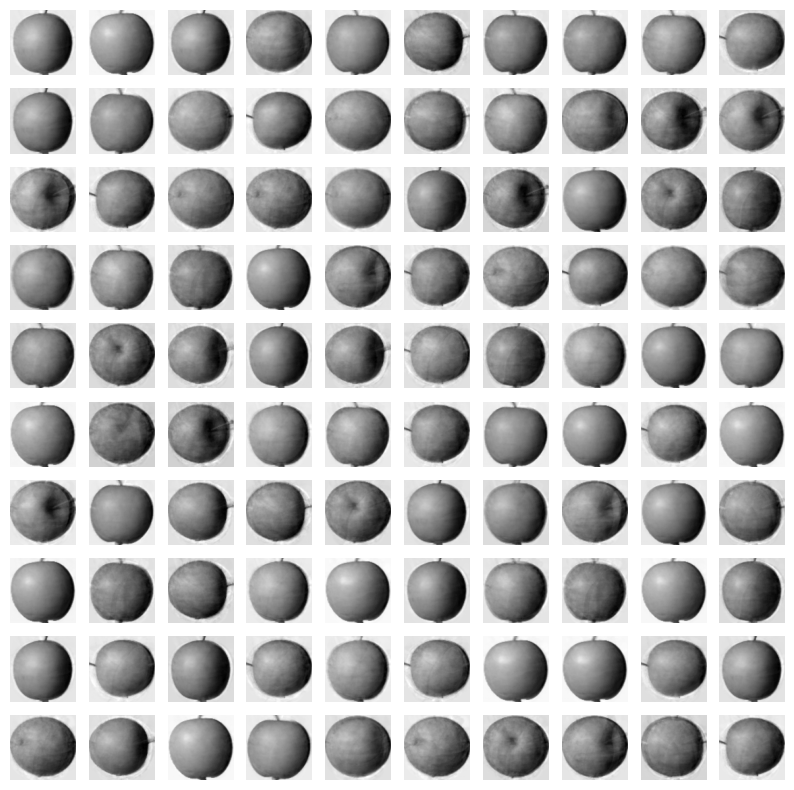

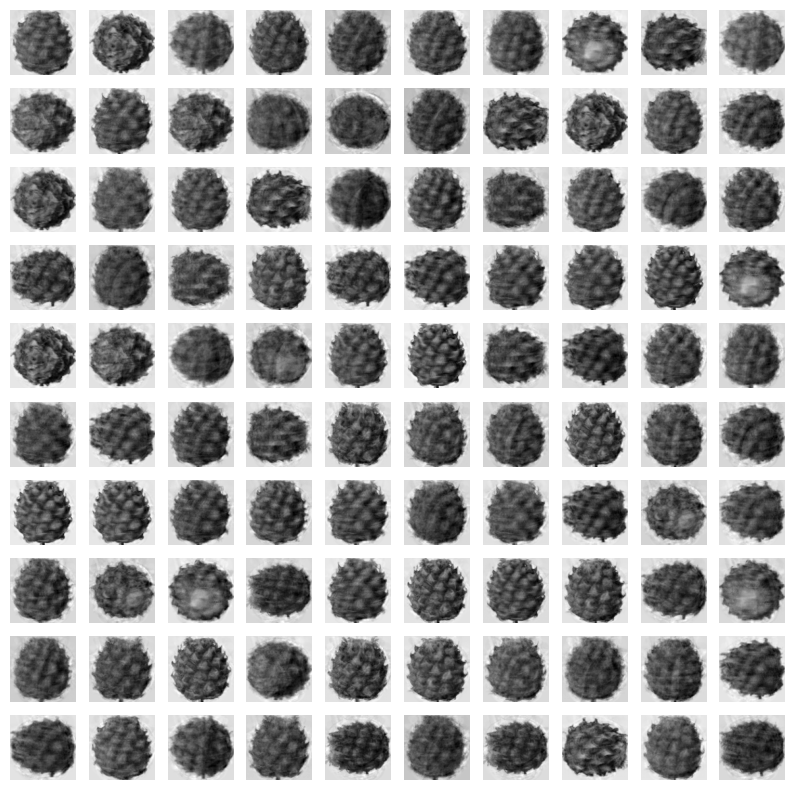

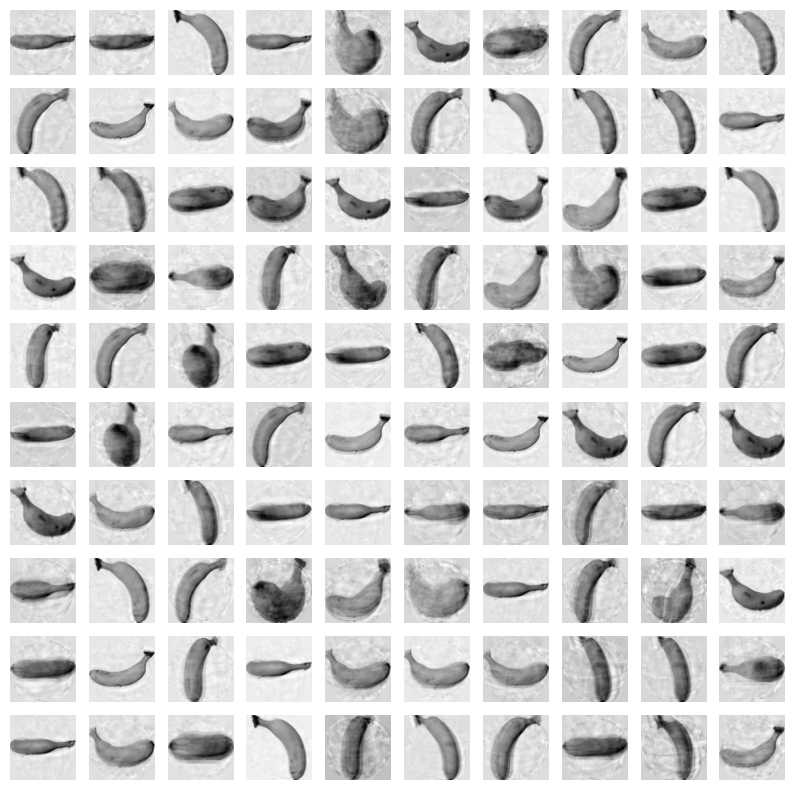

In [14]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# 설명된 분산

In [19]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511203, 0.00486383, 0.00480346,
       0.00447836, 0.00437316, 0.0040803 , 0.00389472, 0.00372434,
       0.00359269, 0.00331462, 0.00317846, 0.00304336, 0.00303778,
       0.00288859, 0.0027583 , 0.00265018, 0.00255826, 0.00251999,
       0.0024684 , 0.00239703, 0.00230882, 0.00221527, 0.00216646,
       0.00213435, 0.00196679, 0.00192946, 0.0019072 , 0.00183442,
       0.00182596, 0.00172487, 0.00168456, 0.00162111, 0.00159215])

In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9215302310758408


In [16]:
import matplotlib.pyplot as plt

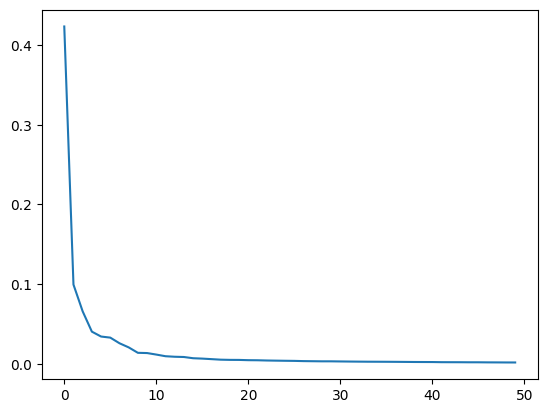

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 차원 축소 후에도 모델의 성능이 줄어들지 않는지 검증

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [21]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [22]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6089746952056885


In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.01370859146118164


In [27]:
fruits_2d.shape

(300, 10000)

In [26]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
fruits_pca = pca.transform(fruits_2d)

In [28]:
fruits_pca.shape

(300, 50)

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

c:\ProgramData\anaconda3\envs\mldltest1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

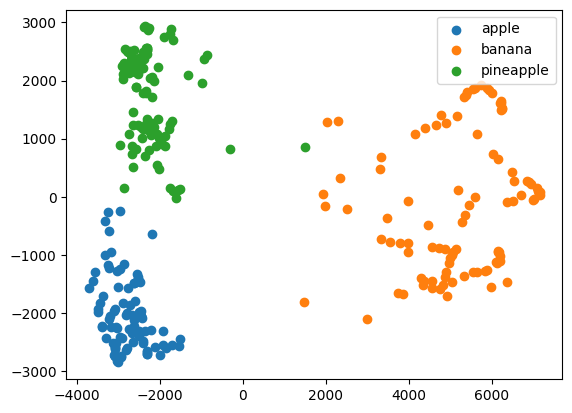

In [31]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# 확인 문제

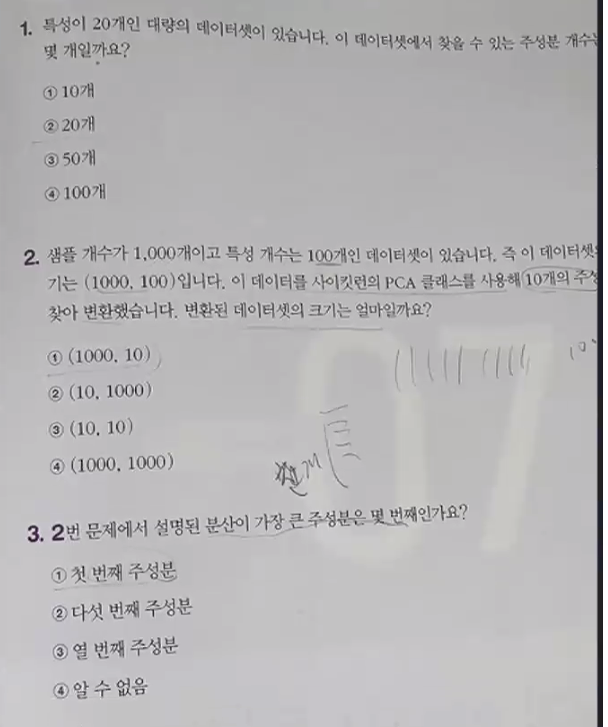

In [ ]:
# 1. 2 // 2. 1 // 3. 1